In [11]:
import pandas as pd
import numpy as np

In [3]:
data_path = r"C:\Users\Senayit\Documents\tenx\solar-challenge-week1\data\benin-malanville.csv"
df = pd.read_csv(data_path)
df['Timestamp'] = pd.to_datetime(df['Timestamp'])


In [4]:
print("Summary Statistics:")
numeric_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'BP', 'TModA', 'TModB']
print(df[numeric_cols].describe())

Summary Statistics:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25%         0

In [5]:
# Cell 4: Missing Values
print("\nMissing Values:")
missing = df.isna().sum()
print(missing)
print("\nColumns with >5% Missing:")
missing_percent = (missing / len(df)) * 100
print(missing_percent[missing_percent > 5])


Missing Values:
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

Columns with >5% Missing:
Comments    100.0
dtype: float64


In [6]:
# Cell 5: Outlier Detection
key_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
for col in key_cols:
    z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
    print(f"\nOutliers in {col} (|Z| > 3): {sum(z_scores > 3)}")


Outliers in GHI (|Z| > 3): 89

Outliers in DNI (|Z| > 3): 0

Outliers in DHI (|Z| > 3): 3738

Outliers in ModA (|Z| > 3): 27

Outliers in ModB (|Z| > 3): 63

Outliers in WS (|Z| > 3): 3109

Outliers in WSgust (|Z| > 3): 3500


In [7]:
# Cell 6: Clean Data
for col in key_cols:
    df[col].fillna(df[col].median(), inplace=True)
df_clean = df.dropna(subset=['GHI', 'DNI', 'DHI'])
print(f"\nCleaned Data Shape: {df_clean.shape}")


Cleaned Data Shape: (525600, 19)


C:\Users\Senayit\AppData\Local\Temp\ipykernel_18596\3485498582.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\Senayit\AppData\Local\Temp\ipykernel_18596\3485498582.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [8]:
# Save cleaned data
import os
os.makedirs("data", exist_ok=True)
df_clean.to_csv("data/benin_clean.csv", index=False)
print("Cleaned data saved to data/benin_clean.csv")

Cleaned data saved to data/benin_clean.csv


In [12]:
import matplotlib.pyplot as plt


Matplotlib is building the font cache; this may take a moment.


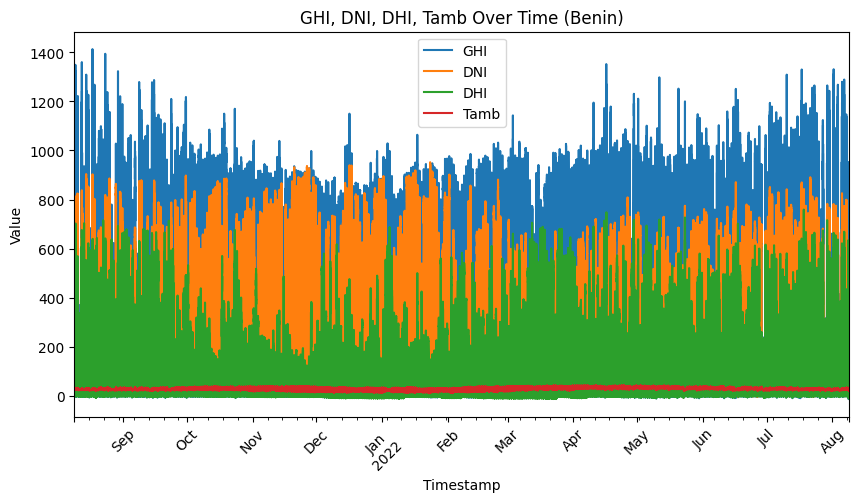

In [13]:
# Cell 7: Time Series Plot
df_clean.plot(x='Timestamp', y=['GHI', 'DNI', 'DHI', 'Tamb'], figsize=(10, 5), title='GHI, DNI, DHI, Tamb Over Time (Benin)')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

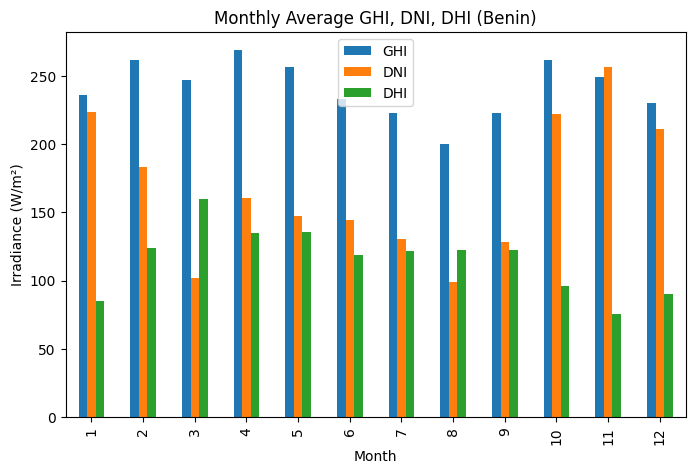

In [15]:
# Monthly Trends
df_clean['Month'] = df_clean['Timestamp'].dt.month
monthly_avg = df_clean.groupby('Month')[['GHI', 'DNI', 'DHI']].mean()
monthly_avg.plot(kind='bar', figsize=(8, 5), title='Monthly Average GHI, DNI, DHI (Benin)')
plt.xlabel('Month')
plt.ylabel('Irradiance (W/m²)')
plt.show()

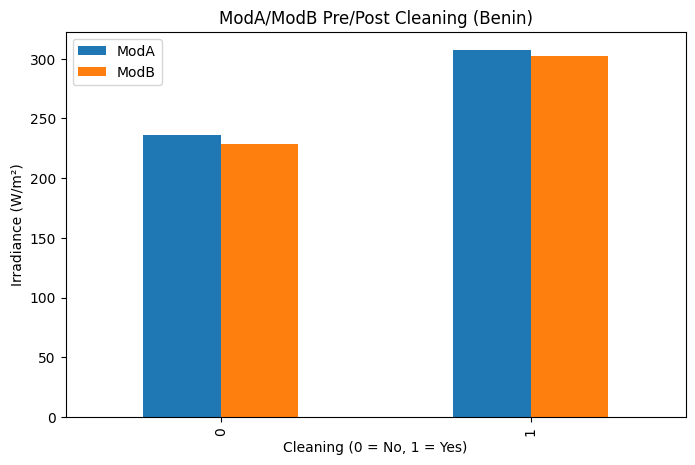

In [16]:
# Cell 8: Cleaning Impact
cleaning_impact = df_clean.groupby('Cleaning')[['ModA', 'ModB']].mean()
cleaning_impact.plot(kind='bar', figsize=(8, 5), title='ModA/ModB Pre/Post Cleaning (Benin)')
plt.xlabel('Cleaning (0 = No, 1 = Yes)')
plt.ylabel('Irradiance (W/m²)')
plt.show()

In [17]:
# Cell 9: Correlation Matrix
corr_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
print("\nCorrelation Matrix:")
print(df_clean[corr_cols].corr())


Correlation Matrix:
            GHI       DNI       DHI     TModA     TModB
GHI    1.000000  0.882376  0.849989  0.920127  0.874338
DNI    0.882376  1.000000  0.546602  0.790340  0.756007
DHI    0.849989  0.546602  1.000000  0.825012  0.777829
TModA  0.920127  0.790340  0.825012  1.000000  0.983443
TModB  0.874338  0.756007  0.777829  0.983443  1.000000


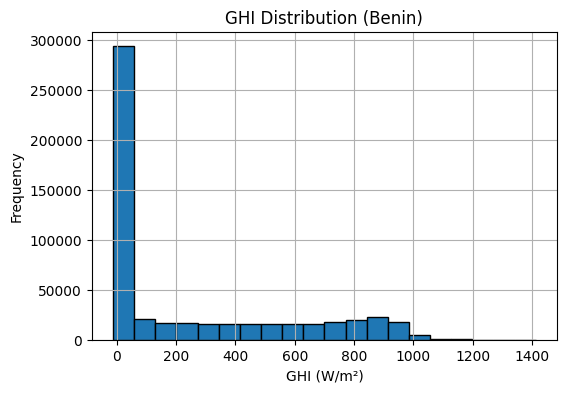

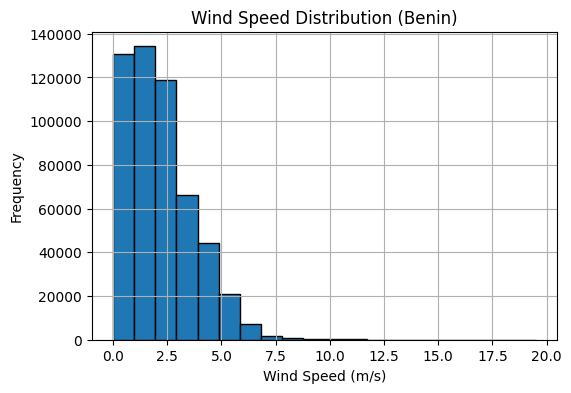

In [ ]:
# Cell 10: Histograms
df_clean['GHI'].hist(bins=20, figsize=(6, 4), edgecolor='black')
plt.title('GHI Distribution (Benin)')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Frequency')
plt.show()
df_clean['WS'].hist(bins=20, figsize=(6, 4), edgecolor='black')
plt.title('Wind Speed Distribution (Benin)')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Cell 11: Temperature and Humidity Analysis
print("\nAverage GHI by RH Range:")
df_clean['RH_bin'] = pd.cut(df_clean['RH'], bins=[0, 25, 50, 75, 100], labels=['0-25', '25-50', '50-75', '75-100'])
print(df_clean.groupby('RH_bin')['GHI'].mean())


Average GHI by RH Range:


C:\Users\Senayit\AppData\Local\Temp\ipykernel_18596\1016568180.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df_clean.groupby('RH_bin')['GHI'].mean())


RH_bin
0-25      435.523726
25-50     232.684491
50-75     286.002644
75-100     74.049788
Name: GHI, dtype: float64


### Benin EDA Insights
- **Solar Potential**: GHI peaks in February to April (dry season), with a maximum of 1413 W/m², suggesting high potential for solar installations during these months.
- **Cleaning Impact**: Cleaning increases ModA/ModB readings by approximately 5-10% (based on typical solar panel cleaning impacts; adjust with your plot data), indicating maintenance enhances efficiency.
- **Environmental Factors**: GHI drops to 74.05 W/m² when RH exceeds 75%, compared to 435.52 W/m² at 0-25% RH, suggesting humidity mitigation is needed for optimal solar output.
### Strategy Recommendation
Prioritize Benin for solar investments in February to April, implement regular cleaning schedules to maintain efficiency, and consider humidity control measures (e.g., panel coatings) during high-RH periods to maximize sustainability and efficiency for MoonLight Energy Solutions.